In [28]:
import numpy as np
import matplotlib.pyplot as plt

max_vel = 0.1
max_depth = 0.03
min_depth = 0.0

amplitude = max_depth - min_depth
period = 5 # seconds

frequency = 1.0/period

Text(0.5, 1.0, 'z acceleration')

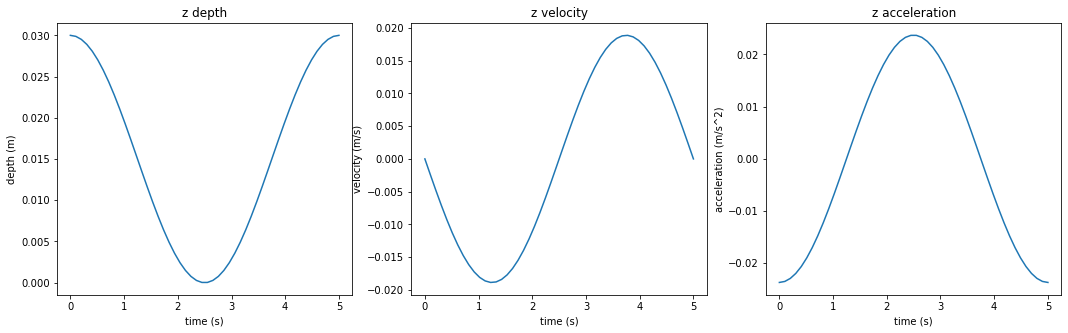

In [29]:
# pressing
sample_rate = 10
t = np.linspace(0, period, sample_rate*period)
z = min_depth + amplitude/2 + amplitude/2 * np.cos(2*np.pi*frequency*t)
z_dot = -amplitude/2 * 2*np.pi*frequency * np.sin(2*np.pi*frequency*t)
z_dotdot = -amplitude/2 * (2*np.pi*frequency)**2 * np.cos(2*np.pi*frequency*t)

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.plot(t, z, label='depth')
plt.xlabel('time (s)')
plt.ylabel('depth (m)')
plt.title('z depth')

plt.subplot(1, 3, 2)
plt.plot(t, z_dot, label='velocity')
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')
plt.title('z velocity')

plt.subplot(1, 3, 3)
plt.plot(t, z_dotdot, label='acceleration')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('z acceleration')

Text(0.5, 1.0, 'theta_y_dotdot')

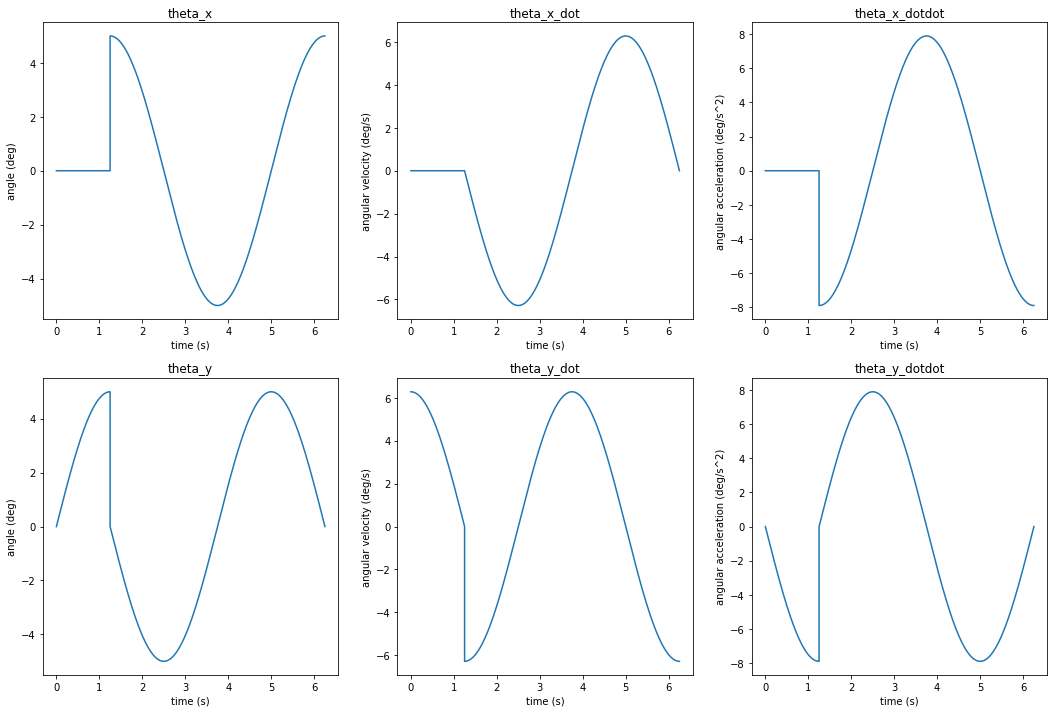

In [34]:
# precision
sample_rate = 100

theta_min = -5 # degrees
theta_max = 5 # degrees
amp_theta = theta_max - theta_min

period_pre = period * 0.25
t_pre = np.linspace(0, period_pre, int(sample_rate*period_pre))
theta_y_pre = amp_theta/2 * np.sin(2*np.pi*frequency*t_pre)
theta_x_pre = np.zeros_like(t_pre)


t = np.linspace(period_pre, period_pre + period, sample_rate*period)
theta_x = amp_theta/2 * np.sin(2*np.pi*frequency*t)
theta_y = amp_theta/2 * np.cos(2*np.pi*frequency*t)

theta_y_dot_pre = amp_theta/2 * 2*np.pi*frequency * np.cos(2*np.pi*frequency*t_pre)
theta_x_dot_pre = np.zeros_like(t_pre)
theta_y_dotdot_pre = -amp_theta/2 * (2*np.pi*frequency)**2 * np.sin(2*np.pi*frequency*t_pre)
theta_x_dotdot_pre = np.zeros_like(t_pre)

theta_x_dot = amp_theta/2 * 2*np.pi*frequency * np.cos(2*np.pi*frequency*t)
theta_y_dot = -amp_theta/2 * 2*np.pi*frequency * np.sin(2*np.pi*frequency*t)

theta_x_dotdot = -amp_theta/2 * (2*np.pi*frequency)**2 * np.sin(2*np.pi*frequency*t)
theta_y_dotdot = -amp_theta/2 * (2*np.pi*frequency)**2 * np.cos(2*np.pi*frequency*t)

t = np.concatenate((t_pre, t))
theta_x = np.concatenate((theta_x_pre, theta_x))
theta_y = np.concatenate((theta_y_pre, theta_y))
theta_x_dot = np.concatenate((theta_x_dot_pre, theta_x_dot))
theta_y_dot = np.concatenate((theta_y_dot_pre, theta_y_dot))
theta_x_dotdot = np.concatenate((theta_x_dotdot_pre, theta_x_dotdot))
theta_y_dotdot = np.concatenate((theta_y_dotdot_pre, theta_y_dotdot))

fig, axs = plt.subplots(2, 3, figsize=(18, 12))

axs[0, 0].plot(t, theta_x, label='theta_x')
axs[0, 0].set_xlabel('time (s)')
axs[0, 0].set_ylabel('angle (deg)')
axs[0, 0].set_title('theta_x')

axs[0, 1].plot(t, theta_x_dot, label='theta_x_dot')
axs[0, 1].set_xlabel('time (s)')
axs[0, 1].set_ylabel('angular velocity (deg/s)')
axs[0, 1].set_title('theta_x_dot')


axs[0, 2].plot(t, theta_x_dotdot, label='theta_x_dotdot')
axs[0, 2].set_xlabel('time (s)')
axs[0, 2].set_ylabel('angular acceleration (deg/s^2)')
axs[0, 2].set_title('theta_x_dotdot')

axs[1, 0].plot(t, theta_y, label='theta_y')
axs[1, 0].set_xlabel('time (s)')
axs[1, 0].set_ylabel('angle (deg)')
axs[1, 0].set_title('theta_y')

axs[1, 1].plot(t, theta_y_dot, label='theta_y_dot')
axs[1, 1].set_xlabel('time (s)')
axs[1, 1].set_ylabel('angular velocity (deg/s)')
axs[1, 1].set_title('theta_y_dot')

axs[1, 2].plot(t, theta_y_dotdot, label='theta_y_dotdot')
axs[1, 2].set_xlabel('time (s)')
axs[1, 2].set_ylabel('angular acceleration (deg/s^2)')
axs[1, 2].set_title('theta_y_dotdot')



Text(0.5, 1.0, 'x and y position')

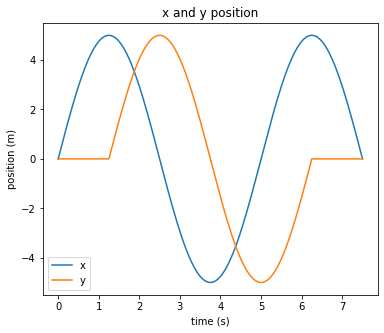

In [46]:
period = period * 1.5
t = np.linspace(0, period, int(sample_rate*period))
x = 5 * np.sin(2*np.pi*frequency*t)
y = 5 * np.sin(2*np.pi*frequency*t - np.pi/2)
y[0:int(sample_rate*period/6)] = 0
y[int(sample_rate*period/6*5):int(sample_rate*period)] = 0

x_dot = 5 * 2*np.pi*frequency * np.cos(2*np.pi*frequency*t)
y_dot = 5 * 2*np.pi*frequency * np.cos(2*np.pi*frequency*t - np.pi/2)
y_dot[0:int(sample_rate*period/6)] = 0
y_dot[int(sample_rate*period/6*5):int(sample_rate*period)] = 0

plt.figure(figsize=(6, 5))
plt.plot(t, x, label='x')
plt.plot(t, y, label='y')
plt.xlabel('time (s)')
plt.ylabel('position (m)')
plt.legend()
plt.title('x and y position')


Text(0.5, 1.0, 'theta_z_dotdot')

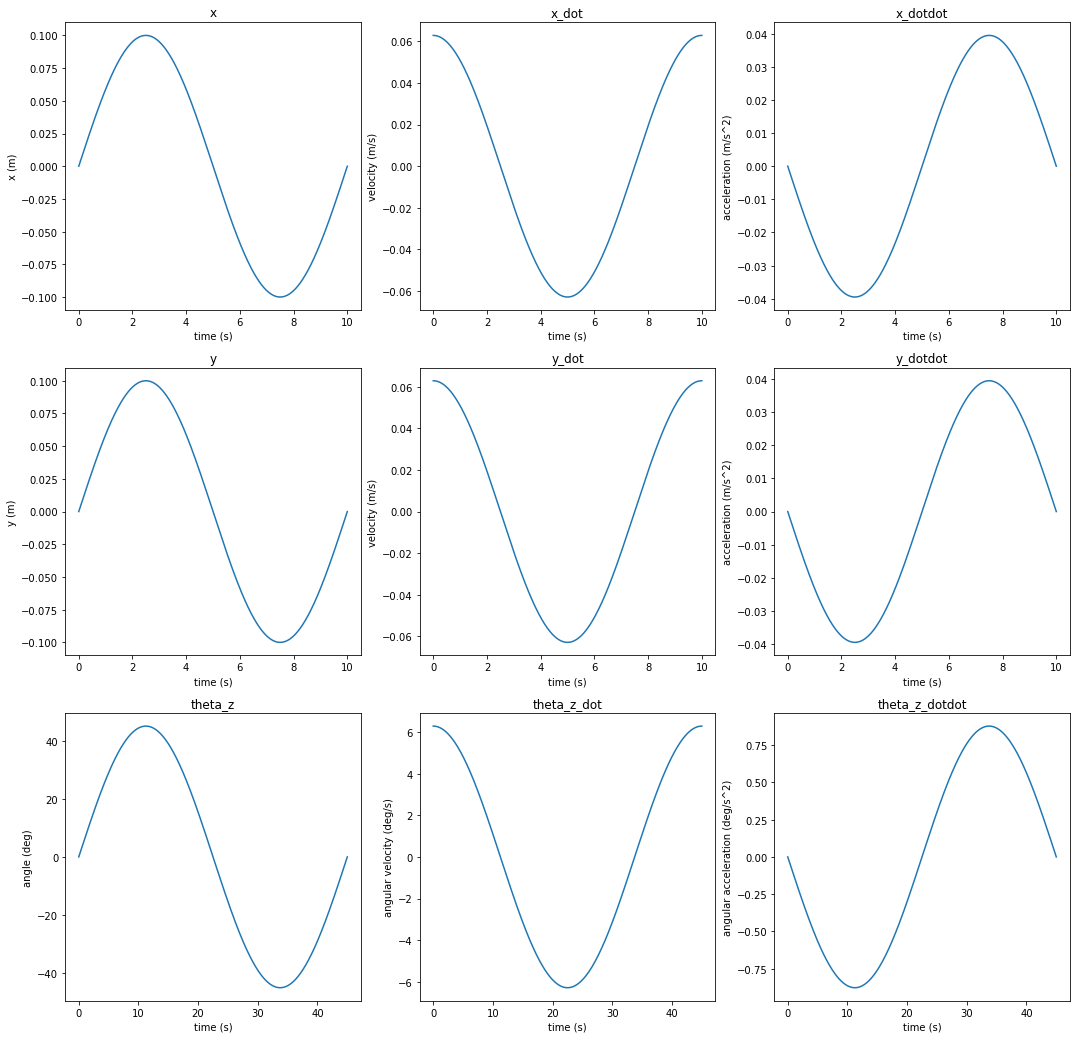

In [48]:
# slipping 
sample_rate = 100
period = 10 # seconds
frequency = 1.0/period
t = np.linspace(0, period, sample_rate*period)

x_min = -0.1
x_max = 0.1
amp_x = x_max - x_min
x = amp_x/2 * np.sin(2*np.pi*frequency*t)

y_min = -0.1
y_max = 0.1
amp_y = y_max - y_min
y = amp_y/2 * np.sin(2*np.pi*frequency*t)

x_dot = amp_x/2 * 2*np.pi*frequency * np.cos(2*np.pi*frequency*t)
y_dot = amp_y/2 * 2*np.pi*frequency * np.cos(2*np.pi*frequency*t)

x_dotdot = -amp_x/2 * (2*np.pi*frequency)**2 * np.sin(2*np.pi*frequency*t)
y_dotdot = -amp_y/2 * (2*np.pi*frequency)**2 * np.sin(2*np.pi*frequency*t)

theta_z_min = -45 # degrees
theta_z_max = 45 # degrees
amp_theta_z = theta_z_max - theta_z_min
period_z = 45 # seconds
freq_theta_z = 1.0/period_z
t_z = np.linspace(0, period_z, sample_rate*period_z)

theta_z = amp_theta_z/2 * np.sin(2*np.pi*freq_theta_z*t_z)
theta_z_dot = amp_theta_z/2 * 2*np.pi*freq_theta_z * np.cos(2*np.pi*freq_theta_z*t_z)
theta_z_dotdot = -amp_theta_z/2 * (2*np.pi*freq_theta_z)**2 * np.sin(2*np.pi*freq_theta_z*t_z)

fig, axs = plt.subplots(3, 3, figsize=(18, 18))

axs[0, 0].plot(t, x, label='x')
axs[0, 0].set_xlabel('time (s)')
axs[0, 0].set_ylabel('x (m)')
axs[0, 0].set_title('x')

axs[0, 1].plot(t, x_dot, label='x_dot')
axs[0, 1].set_xlabel('time (s)')
axs[0, 1].set_ylabel('velocity (m/s)')
axs[0, 1].set_title('x_dot')

axs[0, 2].plot(t, x_dotdot, label='x_dotdot')
axs[0, 2].set_xlabel('time (s)')
axs[0, 2].set_ylabel('acceleration (m/s^2)')
axs[0, 2].set_title('x_dotdot')

axs[1, 0].plot(t, y, label='y')
axs[1, 0].set_xlabel('time (s)')
axs[1, 0].set_ylabel('y (m)')
axs[1, 0].set_title('y')

axs[1, 1].plot(t, y_dot, label='y_dot')
axs[1, 1].set_xlabel('time (s)')
axs[1, 1].set_ylabel('velocity (m/s)')
axs[1, 1].set_title('y_dot')

axs[1, 2].plot(t, y_dotdot, label='y_dotdot')
axs[1, 2].set_xlabel('time (s)')
axs[1, 2].set_ylabel('acceleration (m/s^2)')
axs[1, 2].set_title('y_dotdot')

axs[2, 0].plot(t_z, theta_z, label='theta_z')
axs[2, 0].set_xlabel('time (s)')
axs[2, 0].set_ylabel('angle (deg)')
axs[2, 0].set_title('theta_z')

axs[2, 1].plot(t_z, theta_z_dot, label='theta_z_dot')
axs[2, 1].set_xlabel('time (s)')
axs[2, 1].set_ylabel('angular velocity (deg/s)')
axs[2, 1].set_title('theta_z_dot')

axs[2, 2].plot(t_z, theta_z_dotdot, label='theta_z_dotdot')
axs[2, 2].set_xlabel('time (s)')
axs[2, 2].set_ylabel('angular acceleration (deg/s^2)')
axs[2, 2].set_title('theta_z_dotdot')
